In [69]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [44]:
bank = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Bankruptcy/Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [45]:
X = bank.drop(['NO',"D","YR"], axis = 1)
y = bank['D']

In [18]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
clf = DecisionTreeClassifier(random_state=23)
print(clf.get_params())
params ={'max_depth':[None,3,4,5,6,7], 'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv = GridSearchCV(clf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'best'}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-6.675 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-12.015 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-11.090 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-11.090 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-8.318 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-6.675 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples

[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-3.419 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-1.838 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.379 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-2.975 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-7.131 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-3.419 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-1.838 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-0.379 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-2.975 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-5.771 total time=   0.

[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-4.671 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-4.301 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-1.760 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-4.230 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-5.771 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-4.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-2.936 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-2.760 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-5.476 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-4.404 total time= 

[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-2.760 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-5.517 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-4.404 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-4.754 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-1.558 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-2.760 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-5.517 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-4.404 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-4.754 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-1.558 total time=   

[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-2.915 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-4.447 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-4.730 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-1.608 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-0.315 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-1.703 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-1.672 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-3.340 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-1.550 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=10, min_samples_split=5;, score=-0.315 total tim

[CV 1/5] END max_depth=7, min_samples_leaf=20, min_samples_split=10;, score=-0.271 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=20, min_samples_split=10;, score=-4.303 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=20, min_samples_split=10;, score=-0.448 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=20, min_samples_split=10;, score=-0.737 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=20, min_samples_split=10;, score=-1.642 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=20, min_samples_split=20;, score=-0.271 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=20, min_samples_split=20;, score=-4.303 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=20, min_samples_split=20;, score=-0.448 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=20, min_samples_split=20;, score=-0.737 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=20, min_samples_split=20;, score=-1.642

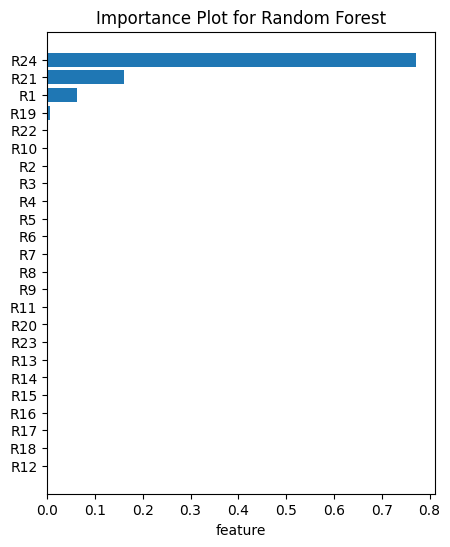

In [42]:
bm_rf =gcv.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.xlabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

In [14]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_rf.fit(X,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.400 total time=   0.2s
[CV 2/5] END ...................max_features=2;, score=-0.437 total time=   0.2s
[CV 3/5] END ...................max_features=2;, score=-0.477 total time=   0.2s
[CV 4/5] END ...................max_features=2;, score=-0.316 total time=   0.2s
[CV 5/5] END ...................max_features=2;, score=-0.368 total time=   0.2s
[CV 1/5] END ...................max_features=3;, score=-0.404 total time=   0.1s
[CV 2/5] END ...................max_features=3;, score=-0.428 total time=   0.2s
[CV 3/5] END ...................max_features=3;, score=-0.434 total time=   0.2s
[CV 4/5] END ...................max_features=3;, score=-0.292 total time=   0.2s
[CV 5/5] END ...................max_features=3;, score=-0.377 total time=   0.1s
[CV 1/5] END ...................max_features=4;, score=-0.419 total time=   0.2s
[CV 2/5] END ...................max_features=4;, 

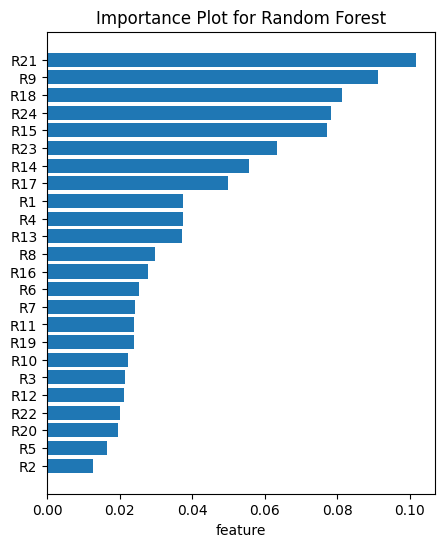

In [43]:
bm_rf =gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.xlabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

In [47]:
concrete = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Concrete Strength/Concrete_Data.csv")
concrete

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [48]:
X = concrete.drop(['Strength'], axis = 1)
y = concrete['Strength']

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
reg = DecisionTreeRegressor(random_state=23)
print(reg.get_params())
params ={'max_depth':[None,3,4,5,6,7], 'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv = GridSearchCV(reg, param_grid=params, verbose=3, cv=kfold, scoring='neg_mean_squared_error')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'best'}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-47.016 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-32.768 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-28.209 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-41.914 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-64.821 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-44.557 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, m

[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-120.689 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-109.108 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-109.154 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-120.348 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-106.828 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-120.689 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-109.108 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-109.154 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-120.348 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-106.828

[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-84.490 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-95.256 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-87.989 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-89.516 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-102.534 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=2;, score=-84.490 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-95.256 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-87.989 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-89.516 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=-102.534 total 

[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-63.989 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-75.226 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-85.752 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-73.636 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=20;, score=-78.449 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=20;, score=-63.110 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=20;, score=-75.904 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=20;, score=-87.763 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=20;, score=-76.501 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=-81.317

[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-67.861 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-60.392 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-68.204 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-70.383 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=-67.069 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-70.218 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-61.586 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-70.633 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-69.423 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=10, min_samples_split=2;, score=-68.947

[CV 1/5] END max_depth=7, min_samples_leaf=10, min_samples_split=2;, score=-67.649 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=10, min_samples_split=2;, score=-56.782 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=2;, score=-62.405 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=2;, score=-60.784 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=2;, score=-70.660 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-67.649 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-56.782 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-62.405 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-60.784 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-70.660

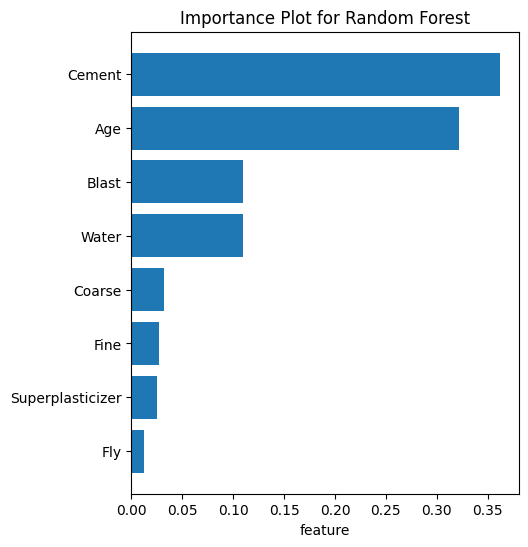

In [55]:
bm_rf =gcv.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.xlabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

In [54]:
rf = RandomForestRegressor(random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_mean_squared_error')
gcv_rf.fit(X,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................max_features=2;, score=-32.768 total time=   0.3s
[CV 2/5] END ..................max_features=2;, score=-27.305 total time=   0.2s
[CV 3/5] END ..................max_features=2;, score=-19.847 total time=   0.3s
[CV 4/5] END ..................max_features=2;, score=-25.684 total time=   0.3s
[CV 5/5] END ..................max_features=2;, score=-30.547 total time=   0.2s
[CV 1/5] END ..................max_features=3;, score=-30.022 total time=   0.3s
[CV 2/5] END ..................max_features=3;, score=-25.290 total time=   0.3s
[CV 3/5] END ..................max_features=3;, score=-17.748 total time=   0.3s
[CV 4/5] END ..................max_features=3;, score=-23.841 total time=   0.3s
[CV 5/5] END ..................max_features=3;, score=-27.085 total time=   0.3s
[CV 1/5] END ..................max_features=4;, score=-31.090 total time=   0.4s
[CV 2/5] END ..................max_features=4;, s

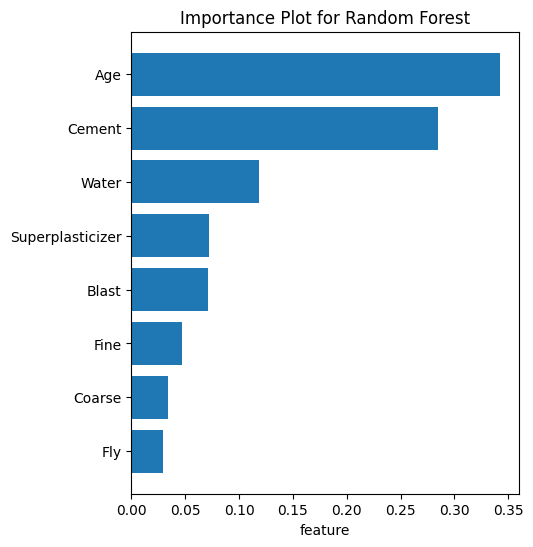

In [56]:
bm_rf =gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,6))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.xlabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

## Chemical Process Dataset

In [59]:
chem = pd.read_csv("/home/darkstar/Downloads/Cases/Chemical Process Data/ChemicalProcess.csv")
chem

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,NaN,1.0,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,NaN,1.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


In [68]:
X = chem.drop(['Yield'], axis = 1)
y = chem['Yield']
#print(X.isnull().sum())

In [81]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
imputer = SimpleImputer()
reg = DecisionTreeRegressor(random_state=23)
pipe = Pipeline([('IMPUTER',imputer), ('reg',reg)])
print(pipe.get_params())


{'memory': None, 'steps': [('IMPUTER', SimpleImputer()), ('reg', DecisionTreeRegressor(random_state=23))], 'verbose': False, 'IMPUTER': SimpleImputer(), 'reg': DecisionTreeRegressor(random_state=23), 'IMPUTER__add_indicator': False, 'IMPUTER__copy': True, 'IMPUTER__fill_value': None, 'IMPUTER__keep_empty_features': False, 'IMPUTER__missing_values': nan, 'IMPUTER__strategy': 'mean', 'reg__ccp_alpha': 0.0, 'reg__criterion': 'squared_error', 'reg__max_depth': None, 'reg__max_features': None, 'reg__max_leaf_nodes': None, 'reg__min_impurity_decrease': 0.0, 'reg__min_samples_leaf': 1, 'reg__min_samples_split': 2, 'reg__min_weight_fraction_leaf': 0.0, 'reg__random_state': 23, 'reg__splitter': 'best'}


In [83]:
params ={'IMPUTER__strategy':['mean','median'],'reg__max_depth':[None,3,4,5,6,7], 'reg__min_samples_split':[2,5,10,20],'reg__min_samples_leaf':[1,5,10,20]}
gcv = GridSearchCV(pipe, param_grid=params, verbose=3, cv=kfold, scoring='neg_mean_squared_error')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.093 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.588 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.220 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.298 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-3.018 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, reg__min_samples_split=5;, score=-1.297 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=1, re

[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=None, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.267 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.077 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.963 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.163 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.842 total time=   0.0s
[CV 1/5] END IMPU

[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.958 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.410 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.796 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.446 total time=   0.0s
[CV 5/5] END IMPUTER_

[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-1.955 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.201 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=4, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPU

[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-1.692 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-2.160 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-1.869 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=2;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=2;, score=-2.720 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=2;, score=-1.955 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=2;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER

[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=10;, score=-1.499 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-1.763 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-2.895 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-1.692 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-2.160 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=20;, score=-1.869 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=6, reg__min_samples_leaf=10, reg__min_samples_split=2;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER

[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=10;, score=-1.897 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=10;, score=-2.878 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-1.766 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-2.377 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-1.548 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-2.059 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-3.196 total time=   0.0s
[CV 1/5] END IMPUTER

[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=10;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=10;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.834 total time=   0.0s
[CV 1/5] END 

[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=None, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=None, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=None, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.267 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.077 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-1.963 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=1, reg__min_samples_split=2;, score=-2.163 total time=   0.0

[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.158 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.270 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.310 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=3, reg__min_samples_leaf=20, reg__min_samples_split=2;, score=-1.902 total time=   0.0s
[CV

[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=10;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=10;, score=-2.301 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.673 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-1.850 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=4, reg__min_samples_leaf=10, reg__min_samples_split=20;, score=-2.301 total time=   0.0s

[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=5;, score=-2.740 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=5;, score=-1.850 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=5;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=5;, score=-2.231 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=10;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=10;, score=-2.740 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=5, reg__min_samples_leaf=10, reg__min_samples_split=10;, score=-1.850 total time=   0.0s
[CV

[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=5;, score=-1.421 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=5;, score=-2.071 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=5;, score=-1.563 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=10;, score=-2.382 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=10;, score=-2.614 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=10;, score=-1.421 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=6, reg__min_samples_leaf=5, reg__min_samples_split=10;, score=-2.071 total time=   0.0s
[CV 5/5] 

[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-1.766 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-2.426 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-1.222 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-2.059 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=1, reg__min_samples_split=20;, score=-2.714 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=5, reg__min_samples_split=2;, score=-2.786 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=5, reg__min_samples_split=2;, score=-2.612 total time=   0.0s
[CV 3/5]

[CV 3/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, reg__max_depth=7, reg__min_samples_leaf=20, reg__min_samples_split=20;, score=-2.834 total time=   0.0s
{'IMPUTER__strategy': 'mean', 'reg__max_depth': 5, 'reg__min_samples_leaf': 5, 'reg__min_samples_split': 2}
-1.9210642402875955


In [86]:
imputer = SimpleImputer()
rfr = RandomForestRegressor(random_state=23)
pipe = Pipeline([('IMPUTER',imputer), ('rfr',reg)])
print(pipe.get_params())

{'memory': None, 'steps': [('IMPUTER', SimpleImputer()), ('rfr', DecisionTreeRegressor(random_state=23))], 'verbose': False, 'IMPUTER': SimpleImputer(), 'rfr': DecisionTreeRegressor(random_state=23), 'IMPUTER__add_indicator': False, 'IMPUTER__copy': True, 'IMPUTER__fill_value': None, 'IMPUTER__keep_empty_features': False, 'IMPUTER__missing_values': nan, 'IMPUTER__strategy': 'mean', 'rfr__ccp_alpha': 0.0, 'rfr__criterion': 'squared_error', 'rfr__max_depth': None, 'rfr__max_features': None, 'rfr__max_leaf_nodes': None, 'rfr__min_impurity_decrease': 0.0, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__min_weight_fraction_leaf': 0.0, 'rfr__random_state': 23, 'rfr__splitter': 'best'}


In [87]:
params ={'IMPUTER__strategy':['mean','median'],'rfr__max_depth':[None,3,4,5,6,7], 'rfr__min_samples_split':[2,5,10,20],'rfr__min_samples_leaf':[1,5,10,20]}
gcv = GridSearchCV(pipe, param_grid=params, verbose=3, cv=kfold, scoring='neg_mean_squared_error')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-1.093 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-2.588 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-1.220 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-2.298 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-3.018 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=5;, score=-1.297 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=1, rf

[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=None, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.902 total time=   

[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=3, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-2.834 total time=   0.0s
[CV 1/5] END IM

[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=4, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUT

[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER

[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=10;, score=-1.955 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=10;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=10;, score=-2.186 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.720 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-1.955 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=6, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.414 total time=   0.0s
[CV 5/5] END 

[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=2;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=2;, score=-2.186 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=5;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=5;, score=-2.720 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=5;, score=-1.955 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=5;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=mean, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=5;, score=-2.186 total time=   0.0s
[CV 1/5] END IMPUTER

[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=10;, score=-1.563 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-1.763 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-2.895 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-1.692 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-2.160 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-1.915 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=None, rfr__min_samples_leaf=10, rfr__min_samples_split=2;, score=-2.045 tota

[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=10;, score=-1.963 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=10;, score=-2.351 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=10;, score=-2.388 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-2.533 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-2.541 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-1.963 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=3, rfr__min_samples_leaf=5, rfr__min_samples_split=20;, score=-2.351 total time=   0.0s
[CV 5/

[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=10;, score=-2.583 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=20;, score=-2.046 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=20;, score=-2.000 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=20;, score=-1.791 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=20;, score=-2.286 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__min_samples_split=20;, score=-2.799 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=4, rfr__min_samples_leaf=5, rfr__min_samples_split=2;, score=-2.071 total time=   0.0s
[CV 2/5

[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-1.308 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-2.215 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-2.843 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=5;, score=-2.973 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=5;, score=-2.455 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=5;, score=-1.316 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__min_samples_split=5;, score=-2.006 total time=   0.0s
[CV 5/5] END 

[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=10;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=20;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=20;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=20;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=20;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=5, rfr__min_samples_leaf=20, rfr__min_samples_split=20;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__min_samples_split=2;, score=-2.951 total time=   0.0s
[

[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-2.834 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.558 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.696 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.853 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-1.902 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=6, rfr__min_samples_leaf=20, rfr__min_samples_split=5;, score=-2.834 total time=   0.0s
[CV 1/

[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=10;, score=-2.231 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.045 total time=   0.0s
[CV 2/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.740 total time=   0.0s
[CV 3/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-1.850 total time=   0.0s
[CV 4/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.414 total time=   0.0s
[CV 5/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=10, rfr__min_samples_split=20;, score=-2.231 total time=   0.0s
[CV 1/5] END IMPUTER__strategy=median, rfr__max_depth=7, rfr__min_samples_leaf=20, rfr__min_samples_split=2;, score=-1.558 total time=   0.0s
